In [1]:
!pip install keras_preprocessing



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: c:\users\lenovo\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip


In [1]:
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np


In [2]:
from keras_preprocessing.image import load_img

In [3]:
TRAIN_DIR ='images/train'
TEST_DIR ='images/test'

In [4]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label,"completed")
    return image_paths,labels

In [5]:
train = pd.DataFrame()
train['image'], train['label']=createdataframe(TRAIN_DIR)

disgust completed
happy completed
sad completed
surprise completed


In [6]:
print(train)

                                             image     label
0       images/train\disgust\Training_10371709.jpg   disgust
1       images/train\disgust\Training_10598340.jpg   disgust
2        images/train\disgust\Training_1070239.jpg   disgust
3       images/train\disgust\Training_11050021.jpg   disgust
4       images/train\disgust\Training_11550217.jpg   disgust
...                                            ...       ...
15647  images/train\surprise\Training_99916297.jpg  surprise
15648  images/train\surprise\Training_99924420.jpg  surprise
15649  images/train\surprise\Training_99937001.jpg  surprise
15650  images/train\surprise\Training_99951755.jpg  surprise
15651  images/train\surprise\Training_99984132.jpg  surprise

[15652 rows x 2 columns]


In [7]:
test = pd.DataFrame()
test['image'], test['label']=createdataframe(TEST_DIR)

disgust completed
happy completed
sad completed
surprise completed


In [8]:
print(test)

                                             image     label
0     images/test\disgust\PrivateTest_11895083.jpg   disgust
1     images/test\disgust\PrivateTest_19671520.jpg   disgust
2     images/test\disgust\PrivateTest_21629266.jpg   disgust
3     images/test\disgust\PrivateTest_22382996.jpg   disgust
4     images/test\disgust\PrivateTest_26306320.jpg   disgust
...                                            ...       ...
3958  images/test\surprise\PublicTest_98089595.jpg  surprise
3959  images/test\surprise\PublicTest_98567249.jpg  surprise
3960  images/test\surprise\PublicTest_98972870.jpg  surprise
3961  images/test\surprise\PublicTest_99242645.jpg  surprise
3962  images/test\surprise\PublicTest_99446963.jpg  surprise

[3963 rows x 2 columns]


In [9]:
from tqdm.notebook import tqdm

In [10]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale = True)
        img = np.array(img)
        features.append(img)
    features=np.array(features)
    features=features.reshape(len(features),48,48,1)
    return features

In [11]:
train_features =extract_features(train['image'])

  0%|          | 0/15652 [00:00<?, ?it/s]

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [12]:
!python -m pip install --upgrade pip --user

!pip install pillow




[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: c:\users\lenovo\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip


In [13]:
from PIL import Image
print(Image.__file__)


c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\PIL\Image.py


In [14]:
test_features =extract_features(test['image'])

  0%|          | 0/3963 [00:00<?, ?it/s]

In [15]:
x_train = train_features/255.0
x_test = test_features/255.0

In [16]:
!pip install -U scikit-learn


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: c:\users\lenovo\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip


In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()

In [19]:
le.fit(train['label'])

LabelEncoder()

In [20]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [21]:
y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)


In [22]:
model = Sequential()

model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(4, activation='softmax'))




In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [25]:
model.fit(x= x_train, y= y_train, batch_size= 128, epochs= 20, validation_data = (x_test, y_test))

Epoch 1/20
123/123 [==============================] - 118s 957ms/step - loss: 1.1169 - accuracy: 0.4627 - val_loss: 1.0568 - val_accuracy: 0.5074
Epoch 2/20
123/123 [==============================] - 125s 1s/step - loss: 0.9839 - accuracy: 0.5689 - val_loss: 0.8417 - val_accuracy: 0.6457
Epoch 3/20
123/123 [==============================] - 123s 1000ms/step - loss: 0.8417 - accuracy: 0.6551 - val_loss: 0.7087 - val_accuracy: 0.7149
Epoch 4/20
123/123 [==============================] - 123s 1s/step - loss: 0.7425 - accuracy: 0.7078 - val_loss: 0.6323 - val_accuracy: 0.7532
Epoch 5/20
123/123 [==============================] - 124s 1s/step - loss: 0.6982 - accuracy: 0.7269 - val_loss: 0.5897 - val_accuracy: 0.7721
Epoch 6/20
123/123 [==============================] - 125s 1s/step - loss: 0.6447 - accuracy: 0.7501 - val_loss: 0.5952 - val_accuracy: 0.7620
Epoch 7/20
123/123 [==============================] - 128s 1s/step - loss: 0.6139 - accuracy: 0.7630 - val_loss: 0.5623 - val_accuracy:

In [26]:
model_json = model.to_json()
with open("emotionDetector1.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotionDetector1.keras")    

In [28]:
model_json = model.to_json()
with open("emotionDetector1.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotionDetector1.h5")   

In [29]:
from keras.models import model_from_json

In [30]:
json_file = open("emotionDetector.json","r")
model_json=json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotionDetector.h5")

In [31]:
label = ['disgust','happy','sad','surprise']

In [32]:
def ef(image):
    img = load_img(image, grayscale = True)
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [34]:
image = 'images/test/sad/PrivateTest_709416.jpg'
print("original image of sad folder")
img = ef(image)
pred =  model.predict(img)
pred_label = label[pred.argmax()]
print(" model prediction is ",pred_label )

original image of sad folder
1/1 [==============================] - 0s 40ms/step
 model prediction is  sad


In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
!pip install matplotlib


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: c:\users\lenovo\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip


original image of sad folder
1/1 [==============================] - 0s 56ms/step
 model prediction is  sad


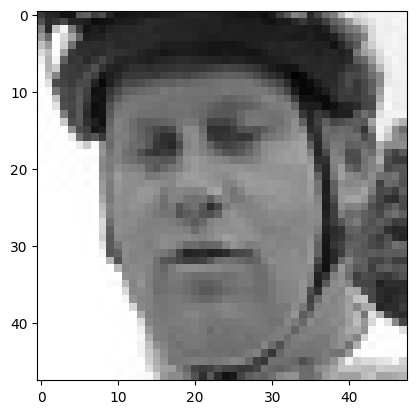

In [38]:
image = 'images/test/sad/PrivateTest_709416.jpg'
print("original image of sad folder")
img = ef(image)
pred =  model.predict(img)
pred_label = label[pred.argmax()]
print(" model prediction is ",pred_label )
plt.imshow(img.reshape(48,48), cmap='gray')